# 보스턴 주택 가격 분석

In [1]:
from keras.datasets import boston_housing

In [2]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [6]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(404, 13) (404,) (102, 13) (102,)


In [7]:
from keras.models import Sequential

# 여기에는 레이어가 하나도 추가되지 않았다.
model = Sequential()

In [8]:
from keras.layers import Activation, Dense

In [11]:
# 입력층 설계
model.add(Dense(10, input_shape=(13,))) # 입력값 13개
model.add(Activation('sigmoid'))

In [12]:
# 은닉 1층
model.add(Dense(10))
model.add(Activation('sigmoid'))

In [13]:
# 은닉 2층
model.add(Dense(10))
model.add(Activation('sigmoid'))

In [14]:
# 출력층
model.add(Dense(1))

### 결과는 위와 같도록 또 다른 방법으로 구현하기

In [19]:
model.add(Dense(10, input_shape=(13,), activation='sigmoid')) # 입력값 13개
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1))

### 모델링

In [20]:
from keras import optimizers

sgd = optimizers.SGD(lr = 0.01)

model.compile(optimizer=sgd,
             loss='mean_squared_error',
             metrics=['mse'])

### 모델 서머리 확인

summary 함수를 이용하여 자신이 생성한 모델의 레이어, 출력모양, 수량 등을 체크한다.

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                140       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
activation (Activation)      (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0

### 모델학습
- 1) batch_size : 한번에 몇개의 데이터를 학습할 수 있는가?
- 2) epochs : 모델의 학습 횟수 지정
- 3) verbose : 모델의 학습 과정을 표시(1) / 안함(0)

In [22]:
model.fit(X_train, y_train, batch_size=50, epochs=100, verbose=1)

Epoch 1/100
9/9 [==============================] - 1s 1ms/step - loss: 410.0584 - mse: 410.0584
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 107.7252 - mse: 107.7252
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 86.0881 - mse: 86.0881
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 73.3161 - mse: 73.3161
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 86.5129 - mse: 86.5129
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 85.6073 - mse: 85.6073
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 82.4489 - mse: 82.4489
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 84.5340 - mse: 84.5340
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 93.4405 - mse: 93.4405
Epoch 10/100
9/9 [==============================] - 0s 997us/step - loss: 85.3481 - mse: 85.3481
Epoch 11/100
9/9 [==============================] - 0

9/9 [==============================] - 0s 1ms/step - loss: 84.2245 - mse: 84.2245
Epoch 87/100
9/9 [==============================] - 0s 873us/step - loss: 85.6027 - mse: 85.6027
Epoch 88/100
9/9 [==============================] - 0s 748us/step - loss: 85.7808 - mse: 85.7808
Epoch 89/100
9/9 [==============================] - 0s 873us/step - loss: 83.0018 - mse: 83.0018
Epoch 90/100
9/9 [==============================] - 0s 873us/step - loss: 97.5421 - mse: 97.5421
Epoch 91/100
9/9 [==============================] - 0s 748us/step - loss: 89.7749 - mse: 89.7749
Epoch 92/100
9/9 [==============================] - 0s 997us/step - loss: 86.2016 - mse: 86.2016
Epoch 93/100
9/9 [==============================] - 0s 873us/step - loss: 80.7873 - mse: 80.7873
Epoch 94/100
9/9 [==============================] - 0s 748us/step - loss: 83.6601 - mse: 83.6601
Epoch 95/100
9/9 [==============================] - 0s 997us/step - loss: 77.7376 - mse: 77.7376
Epoch 96/100
9/9 [===========================

### 모델평가

In [23]:
results = model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 0s/step - loss: 85.1187 - mse: 85.1187


In [24]:
print(model.metrics_names)
print()
print(results)
print()
print('loss : ', results[0])
print()
print('mse : ', results[1])

['loss', 'mse']

[85.11873626708984, 85.11873626708984]

loss :  85.11873626708984

mse :  85.11873626708984


# --------------------------------------------------------------------

# 손글씨 데이터 분류

In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from IPython.display import Image

### 데이터 호출 : 6만개 학습용, 1만개 테스트용으로 구성

In [27]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [28]:
X_train.shape

(60000, 28, 28)

In [29]:
X_test.shape

(10000, 28, 28)

(28, 28)


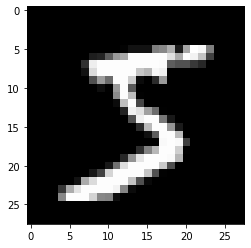

In [35]:
# 이미지를 시각화로 보기

image = X_train[0]
print(image.shape)

plt.imshow(image, 'gray')
plt.show()

In [36]:
X_train[0] # 흰색이 0, 검정이 255 ---> 숫자 5

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [43]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [41]:
# 첫번째 이미지에서 9번째 행값을 출력한다.
X_train[0][8]

array([  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
       253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

### 정규화 : 분서하기 위해 모든 값을 0~1 사이의 숫자로 변환

데이터 타입을 실수형(float)으로 바꿔서 값의 범위를 0 ~ 1 사이의 실수로 변경해준다.

참고 : 
MNIST 데이터의 모든 값은 0 ~ 255 사이의 범위안에 있으므로 해당 값을 최대값인 255로 나누면 정규화가 된다.

In [44]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [45]:
gray_scale = 255

X_train /= gray_scale
X_test /= gray_scale

In [46]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### 다층퍼셉트론으로 모델링

In [49]:
model = Sequential([
    Flatten(input_shape=(28,28)), # 데이터차원변경
    Dense(256, activation='relu'), # 첫번째 히든레이어
    Dense(128, activation='relu'), # 두번째 히든레이어
    Dropout(0.1), # 두번째에 드롭아웃 (10%) 적용
    Dense(10), # 세번재 히든레이어
    Activation('softmax') # 소프트맥스함수사용(다층이기때문에)
])

In [50]:
# 모델 서머리
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1290      
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
________________________________________________

# One-hot encoding

In [59]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics='accuracy')

## 조기종료
- 매주기마다 검증데이터로 검증정확도를 측정하여 검증정확도가 5번 연속으로 개선이 되지 않을 경우 더이상 검증에 의미가 없다고 판단하여 조기종료한다.

In [60]:
callbacks = [EarlyStopping(monitor='val_accuracy',
                         patience=5,
                          restore_best_weights=False),
            ModelCheckpoint(filepath='best_model.h5',
                           monitor='val_accuracy',
                           save_best_only=True)]

## 모델학습

In [61]:
model.fit(X_train, y_train, epochs=300,
         batch_size=1000,
         validation_split=0.1,
         callbacks=callbacks)

Epoch 1/300
54/54 [==============================] - 2s 20ms/step - loss: 1.1647 - accuracy: 0.6588 - val_loss: 0.2124 - val_accuracy: 0.9403
Epoch 2/300
54/54 [==============================] - 1s 11ms/step - loss: 0.2579 - accuracy: 0.9242 - val_loss: 0.1506 - val_accuracy: 0.9590
Epoch 3/300
54/54 [==============================] - 1s 12ms/step - loss: 0.1808 - accuracy: 0.9466 - val_loss: 0.1229 - val_accuracy: 0.9648
Epoch 4/300
54/54 [==============================] - 1s 12ms/step - loss: 0.1422 - accuracy: 0.9587 - val_loss: 0.1012 - val_accuracy: 0.9713
Epoch 5/300
54/54 [==============================] - 1s 12ms/step - loss: 0.1122 - accuracy: 0.9674 - val_loss: 0.0944 - val_accuracy: 0.9742
Epoch 6/300
54/54 [==============================] - 1s 13ms/step - loss: 0.0942 - accuracy: 0.9719 - val_loss: 0.0836 - val_accuracy: 0.9735
Epoch 7/300
54/54 [==============================] - 1s 12ms/step - loss: 0.0751 - accuracy: 0.9786 - val_loss: 0.0796 - val_accuracy: 0.9760
Epoch 

## 모델평가

In [62]:
results = model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 1s 1ms/step - loss: 0.0674 - accuracy: 0.9794


In [63]:
print(model.metrics_names)
print(results)
print('loss :', results[0])
print('mse :', results[1])

['loss', 'accuracy']
[0.06735158711671829, 0.9793999791145325]
loss : 0.06735158711671829
mse : 0.9793999791145325


테스트 결과 : 약 98%의 정확도를 확인할 수 있다.

# ----------------------------------------------------------------------------

# MNIST 또 다른 방법의 실습

In [86]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from IPython.display import Image

In [87]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

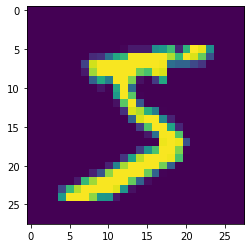

In [88]:
plt.imshow(X_train[0])
plt.show()

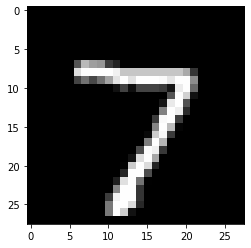

In [89]:
plt.imshow(X_test[0],'gray')
plt.show()

# 행변환 : 1차원 배열을 2차원으로

In [90]:
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [91]:
# 학습용 데이터의 1/3만 테스트한다.

X_train, _, y_train, _ = train_test_split(X_train, y_train,
                                         test_size= 0.67,
                                         random_state=7)

In [92]:
# one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [93]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19800, 784) (10000, 784) (19800, 10) (10000, 10)


In [94]:
# 모델학습
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

In [95]:
model = Sequential()

model.add(Dense(50, input_shape=(784,)))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [96]:
sgd = optimizers.SGD(lr=0.001)

model.compile(optimizer=sgd,
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])

In [98]:
history = model.fit(X_train, y_train, batch_size=256,
                   validation_split=0.3,
                   epochs=100, verbose=0)

In [102]:
print(history.history.keys())
print(history.history['loss'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
[2.375948429107666, 2.363243818283081, 2.3528623580932617, 2.344355821609497, 2.337360143661499, 2.331460475921631, 2.326476812362671, 2.3222672939300537, 2.3187379837036133, 2.3158934116363525, 2.313420295715332, 2.3113415241241455, 2.3096160888671875, 2.30812406539917, 2.306865930557251, 2.305805206298828, 2.304863214492798, 2.3040599822998047, 2.3033969402313232, 2.302863359451294, 2.3023593425750732, 2.301945686340332, 2.3015918731689453, 2.3012914657592773, 2.301017999649048, 2.3007760047912598, 2.300581932067871, 2.3004143238067627, 2.3002755641937256, 2.3001468181610107, 2.3000175952911377, 2.299924850463867, 2.299823045730591, 2.299747943878174, 2.2996749877929688, 2.299607992172241, 2.299560070037842, 2.2995104789733887, 2.2994589805603027, 2.2994136810302734, 2.299370288848877, 2.299330949783325, 2.2992944717407227, 2.2992630004882812, 2.2992334365844727, 2.299199104309082, 2.2991676330566406, 2.2991347312927246, 2.2

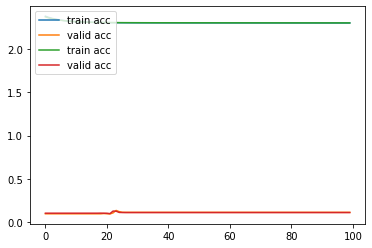

In [104]:
# 시각화

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])

plt.legend(['train acc', 'valid acc', 'train acc', 'valid acc'],
          loc = 'upper left')

plt.show()